<a href="https://colab.research.google.com/github/Andrej40701/Oracle-Tool/blob/main/Oracle_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Oracle Tool/Data/times-sales_20735-2022-06-21.csv', delimiter=';')
dataset

,Zeit,Kurs,Währung,Stück,Kumuliert
0,21.06.2022 16:06:12,"13.330,25",Pkt.,4015,41444239
1,21.06.2022 16:06:11,"13.330,39",Pkt.,958,41440224
2,21.06.2022 16:06:10,"13.330,44",Pkt.,4464,41439266
3,21.06.2022 16:06:09,"13.330,59",Pkt.,69929,41434802
4,21.06.2022 16:06:08,"13.331,31",Pkt.,943,41364873
...,...,...,...,...,...
9995,21.06.2022 13:19:37,"13.366,71",Pkt.,1272,25617998
9996,21.06.2022 13:19:36,"13.366,62",Pkt.,3268,25616726
9997,21.06.2022 13:19:35,"13.366,74",Pkt.,619,25613458
9998,21.06.2022 13:19:34,"13.366,77",Pkt.,0,25612839


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Zeit       10000 non-null  object
 1   Kurs       10000 non-null  object
 2   Währung    10000 non-null  object
 3   Stück      10000 non-null  int64 
 4   Kumuliert  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [ ]:
dataset.describe()

,Stück,Kumuliert
count,10000.000000,1.000000e+04
mean,1583.140000,3.157730e+07
std,4758.156353,4.080816e+06
min,0.000000,2.561284e+07
25%,0.000000,2.826520e+07
50%,175.500000,3.123075e+07
75%,1217.000000,3.359241e+07
max,111840.000000,4.144424e+07


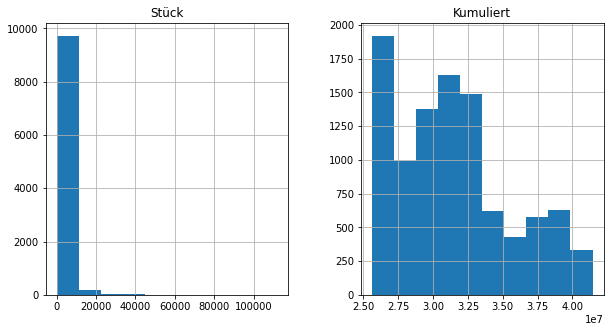

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset.hist(figsize=(10,5));

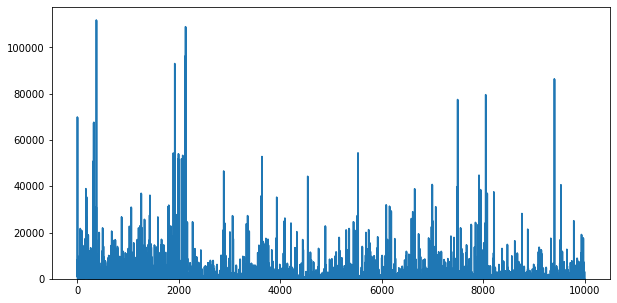

In [ ]:
dataset['Stück'].plot.area(figsize=(10,5))

In [ ]:
def string_to_float(number):
  thousands = int(number.split(',')[0].split('.')[0])
  ones = int(number.split(',')[0].split('.')[1])
  thousandths = int(number.split(',')[1])
  return thousands*1000 + ones + thousandths/1000

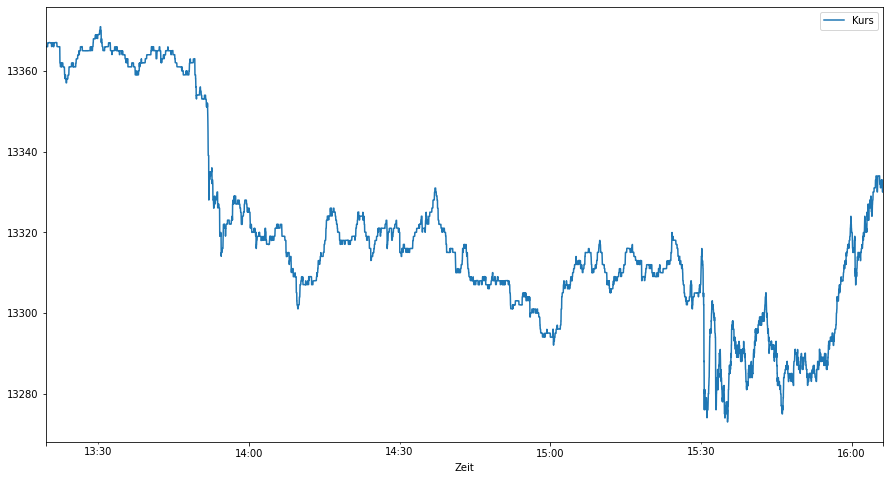

In [ ]:
dataset_1 = dataset.drop(['Währung', 'Stück', 'Kumuliert'], axis=1)
dataset_1['Kurs'] = dataset_1['Kurs'].apply(string_to_float)

dataset_1.index = pd.to_datetime(dataset_1['Zeit'])
del dataset_1['Zeit']

dataset_1.plot(figsize=(15,8))
plt.show()

15th of March

In [ ]:
fifteenth_march = pd.read_csv('drive/MyDrive/Colab Notebooks/Oracle Tool/Data/DAX 15-3-22.csv')
fifteenth_march.drop(fifteenth_march.columns[0], axis=1, inplace=True)
fifteenth_march

,Time,Course,Day Before,Piece,Accumulated
0,16:59:59,"13.843,720","-3,10%",600,76.716.022
1,16:59:58,"13.844,220","-3,10%",617,76.715.422
2,16:59:57,"13.844,040","-3,10%",595,76.714.805
3,16:59:56,"13.844,010","-3,10%",1.170,76.714.210
4,16:59:55,"13.844,560","-3,10%",3.391,76.713.040
...,...,...,...,...,...
28666,09:02:13,"13.763,590","-3,70%",3.335,1.965.691
28667,09:02:12,"13.764,470","-3,70%",10.920,1.962.356
28668,09:02:11,"13.767,470","-3,67%",4.532,1.951.436
28669,09:02:10,"13.767,910","-3,67%",5.098,1.946.904


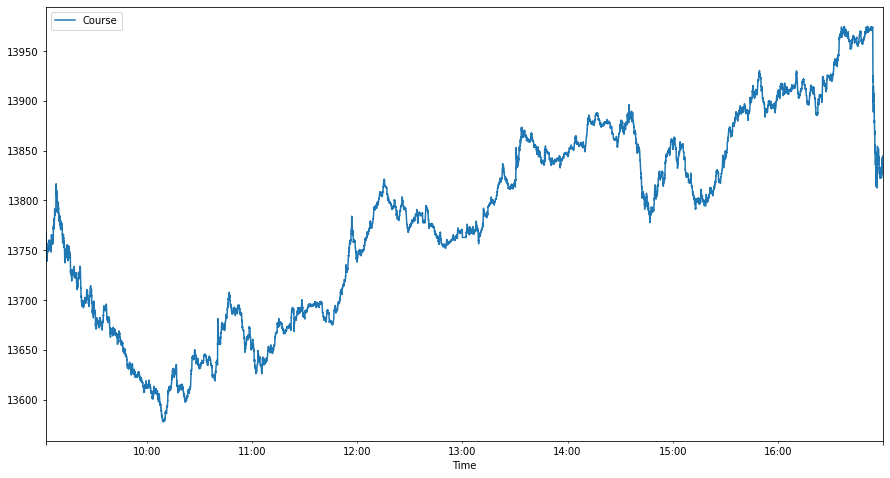

In [ ]:
fifteenth_march_1 = fifteenth_march.drop(['Day Before', 'Piece', 'Accumulated'], axis=1)
fifteenth_march_1['Course'] = fifteenth_march_1['Course'].apply(string_to_float)

fifteenth_march_1.index = pd.to_datetime(fifteenth_march_1['Time'])
del fifteenth_march_1['Time']

fifteenth_march_1.plot(figsize=(15,8))
plt.show()

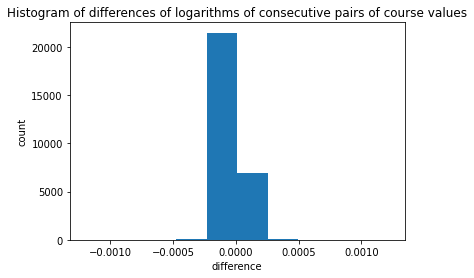

In [ ]:
course = fifteenth_march['Course'].apply(string_to_float).tolist()
differences_of_lns = [math.log(j) - math.log(i) for i, j in zip(course, course[1:])]

plt.hist(differences_of_lns)
plt.title('Histogram of differences of logarithms of consecutive pairs of course values')
plt.xlabel('difference')
plt.ylabel('count')
plt.show()

In [ ]:
average = sum(differences_of_lns)/len(differences_of_lns)
print(average)
inc_dec = ['True' if abs(i) >= abs(average) else 'False' for i in differences_of_lns]
pd.Series(inc_dec).value_counts()

-1.9018777948119976e-07


True     23955
False     4715
dtype: int64

In [ ]:
sum(differences_of_lns[:50])/50

-2.4676218157502204e-05

In [ ]:
average_1 = (math.log(course[51]) - math.log(course[0]))
print(average_1)
inc_dec_1 = ['True' if abs(i) >= abs(average_1) else 'False' for i in differences_of_lns]
pd.Series(inc_dec_1).value_counts()

-0.0011969262977569173


False    28667
True         3
dtype: int64

16th of March

In [ ]:
sixteenth_march = pd.read_csv('drive/MyDrive/Colab Notebooks/Oracle Tool/Data/DAX 16-3-22.csv')
sixteenth_march.drop(sixteenth_march.columns[0], axis=1, inplace=True)
sixteenth_march

,Time,Course,Day Before,Piece,Accumulated
0,16:59:59,"14.407,470","+0,92%",2.060,113.430.166
1,16:59:58,"14.407,250","+0,92%",9.010,113.428.106
2,16:59:57,"14.405,000","+0,91%",4.372,113.419.096
3,16:59:56,"14.404,320","+0,90%",4.938,113.414.724
4,16:59:55,"14.404,650","+0,90%",233,113.409.786
...,...,...,...,...,...
28622,09:02:57,"14.238,380","-0,24%",11.312,3.210.449
28623,09:02:56,"14.238,400","-0,24%",7.735,3.199.137
28624,09:02:55,"14.242,880","-0,21%",18.780,3.191.402
28625,09:02:54,"14.241,210","-0,22%",21.699,3.172.622


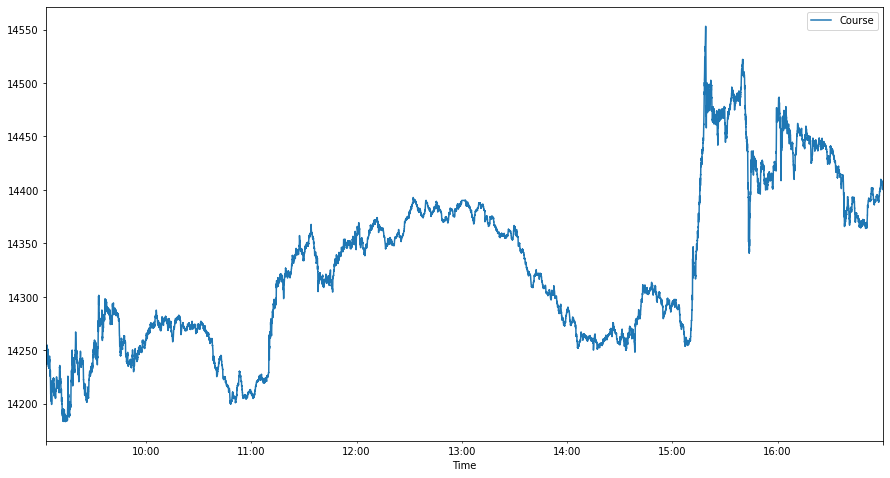

In [ ]:
sixteenth_march_1 = sixteenth_march.drop(['Day Before', 'Piece', 'Accumulated'], axis=1)
sixteenth_march_1['Course'] = sixteenth_march_1['Course'].apply(string_to_float)

sixteenth_march_1.index = pd.to_datetime(sixteenth_march_1['Time'])
del sixteenth_march_1['Time']

sixteenth_march_1.plot(figsize=(15,8))
plt.show()

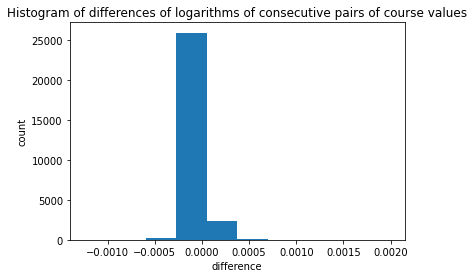

In [ ]:
course = sixteenth_march['Course'].apply(string_to_float).tolist()
differences_of_lns = [math.log(j) - math.log(i) for i, j in zip(course, course[1:])]

plt.hist(differences_of_lns)
plt.title('Histogram of differences of logarithms of consecutive pairs of course values')
plt.xlabel('difference')
plt.ylabel('count')
plt.show()

In [ ]:
average = sum(differences_of_lns)/len(differences_of_lns)
inc_dec = ['True' if abs(i) >= abs(average) else 'False' for i in differences_of_lns]
pd.Series(inc_dec).value_counts()

True     25199
False     3427
dtype: int64

17th of March

In [ ]:
seventeenth_march = pd.read_csv('drive/MyDrive/Colab Notebooks/Oracle Tool/Data/DAX 17-3-22.csv')
seventeenth_march.drop(seventeenth_march.columns[0], axis=1, inplace=True)
seventeenth_march

,Time,Course,Day Before,Piece,Accumulated
0,16:59:59,"14.300,700","+0,18%",3.167,86.271.730
1,16:59:58,"14.300,430","+0,18%",8.415,86.268.563
2,16:59:57,"14.300,320","+0,18%",1.528,86.260.148
3,16:59:56,"14.300,870","+0,18%",1.994,86.258.620
4,16:59:55,"14.300,490","+0,18%",52,86.256.626
...,...,...,...,...,...
28615,09:03:04,"14.494,980","+1,52%",17.680,3.259.974
28616,09:03:03,"14.497,050","+1,54%",19.870,3.242.294
28617,09:03:02,"14.497,750","+1,54%",9.018,3.222.424
28618,09:03:01,"14.499,580","+1,55%",33.301,3.213.406


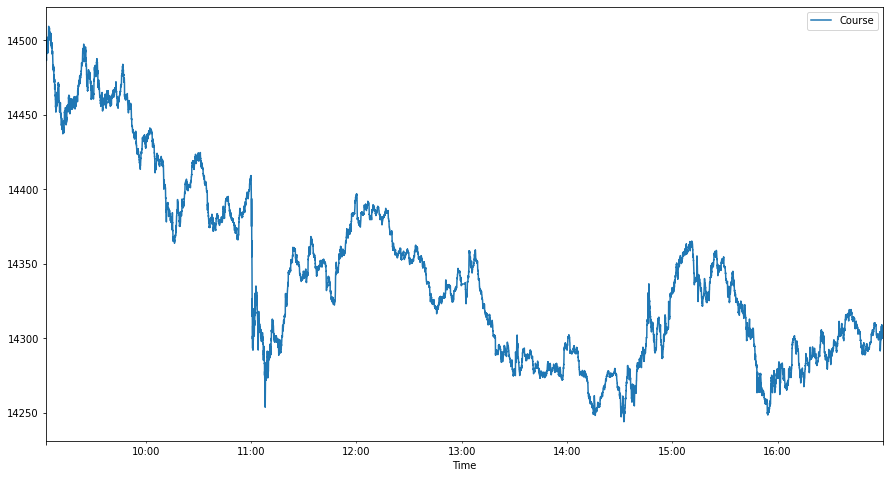

In [ ]:
seventeenth_march_1 = seventeenth_march.drop(['Day Before', 'Piece', 'Accumulated'], axis=1)
seventeenth_march_1['Course'] = seventeenth_march_1['Course'].apply(string_to_float)

seventeenth_march_1.index = pd.to_datetime(seventeenth_march_1['Time'])
del seventeenth_march_1['Time']

seventeenth_march_1.plot(figsize=(15,8))
plt.show()

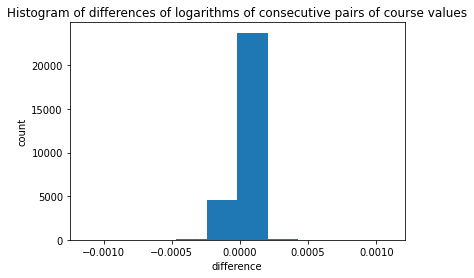

In [ ]:
course = seventeenth_march['Course'].apply(string_to_float).tolist()
differences_of_lns = [math.log(j) - math.log(i) for i, j in zip(course, course[1:])]

plt.hist(differences_of_lns)
plt.title('Histogram of differences of logarithms of consecutive pairs of course values')
plt.xlabel('difference')
plt.ylabel('count')
plt.show()

In [ ]:
average = sum(differences_of_lns)/len(differences_of_lns)
inc_dec = ['True' if abs(i) >= abs(average) else 'False' for i in differences_of_lns]
pd.Series(inc_dec).value_counts()

True     23956
False     4663
dtype: int64